In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
sns.set()
from mpl_toolkits.mplot3d import Axes3D
import itertools

A = np.matrix([[3.0, 2.0], [2.0, 6.0]])
b = np.matrix([[2.0], [-8.0]])  # we will use the convention that a vector is a column vector
c = 0.0

def f(x, A, b, c):
    return float(0.5 * x.T * A * x - b.T * x + c)

def bowl(A, b, c):
    fig = plt.figure(figsize=(10,8))
    qf = fig.gca(projection='3d')
    size = 20
    x1 = list(np.linspace(-6, 6, size))
    x2 = list(np.linspace(-6, 6, size))
    x1, x2 = np.meshgrid(x1, x2)
    zs = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            x = np.matrix([[x1[i,j]], [x2[i,j]]])
            zs[i,j] = f(x, A, b, c)
    qf.plot_surface(x1, x2, zs, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0)
#     fig.show()
    return x1, x2, zs

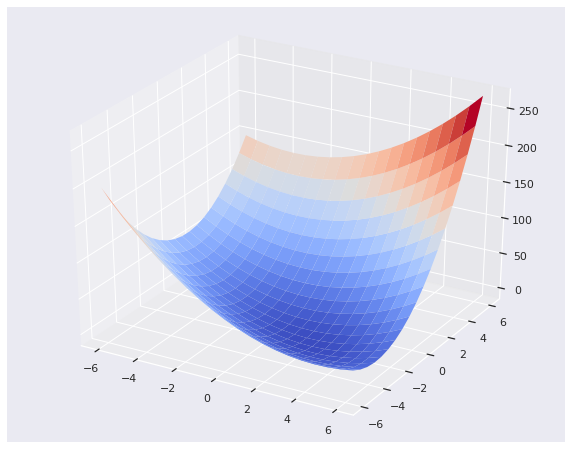

In [4]:
x1, x2, zs = bowl(A, b, c)

In [0]:
def contoursteps(x1, x2, zs, steps=None):
    fig = plt.figure(figsize=(6,6))
    cp = plt.contour(x1, x2, zs, 10)
    plt.clabel(cp, inline=1, fontsize=10)
    if steps is not None:
        steps = np.matrix(steps)
        plt.plot(steps[:,0], steps[:,1], '-o')
#     fig.show()

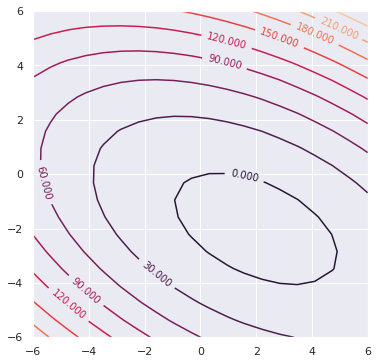

In [6]:
contoursteps(x1, x2, zs)

In [0]:
x = np.matrix([[-2.0],[-2.0]])
steps = [(-2.0, -2.0)]
i = 0
imax = 10
eps = 0.01
r = b - A * x
delta = r.T * r
delta0 = delta
while i < imax and delta > eps**2 * delta0:
    alpha = float(delta / (r.T * (A * r)))
    x = x + alpha * r
    steps.append((x[0,0], x[1,0]))  # store steps for future drawing
    r = b - A * x
    delta = r.T * r
    i += 1

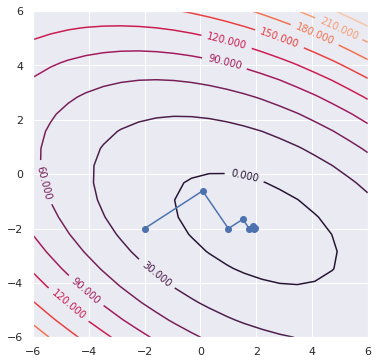

In [8]:
contoursteps(x1, x2, zs, steps)

Let's take a look on a single iteration, especially on the residual $r_i = b - Ax_i$

b:
 [[ 2.]
 [-8.]]
A:
 [[3. 2.]
 [2. 6.]]
x:
 [[-2.]
 [-2.]]
r:
 [[12.]
 [ 8.]]


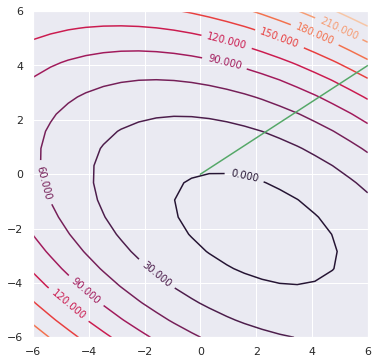

||r||^2 = 207.99999999999997
r.T * r =  [[208.]]


In [9]:
x = np.matrix([[-2.0],[-2.0]])
steps = [(-2.0, -2.0)]
i = 0
imax = 10
eps = 0.01


print('b:\n', b)
print('A:\n', A)
print('x:\n', x)
r = b - A * x
print('r:\n', r)
contoursteps(x1, x2, zs, None)
plt.plot([0, r[0, 0] * 0.5], [0, r[1, 0] * 0.5], 'g')
plt.show()

print('||r||^2 =', np.linalg.norm(r)**2)
delta = r.T * r
print('r.T * r = ',  delta)
delta0 = delta

Note that this direction coincides with the direction of the step. Its length is chosen the best for our task.

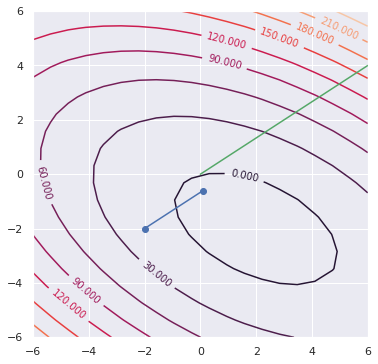

In [10]:
alpha = float(delta / (r.T * A * r))
x = x + alpha * r
contoursteps(x1, x2, zs, [(-2, -2), (x[0, 0], x[1, 0])])
plt.plot([0, r[0, 0] * 0.5], [0, r[1, 0] * 0.5], 'g')
plt.show()

(-6.0, 6.0)

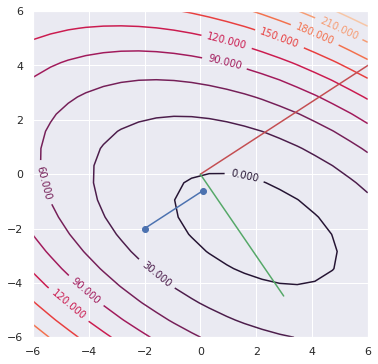

In [11]:
r_new = b - A * x
contoursteps(x1, x2, zs, [(-2, -2), (x[0, 0], x[1, 0])])
plt.plot([0, r[0, 0]], [0, r[1, 0]], 'r')
plt.plot([0, r_new[0, 0]], [0, r_new[1, 0]], 'g')
plt.ylim(-6,6)
plt.xlim(-6,6)

In [0]:
x = np.array([[-2], [2]]) # x0
steps = []
steps.append((x[0,0], x[1,0]))
i = 0
imax = 10000
eps = 0.01
alpha = 0.2  # play with this value to see how it affects the optimization process, try 0.05, 0.27 and 0.3
r = b - A * x
delta = r.T * r
delta0 = delta
while i < imax and delta > eps**2 * delta0:
    x = x + alpha * r
    steps.append((x[0,0], x[1,0]))  # store steps for future drawing
    r = b - A * x
    delta = r.T * r
    i += 1

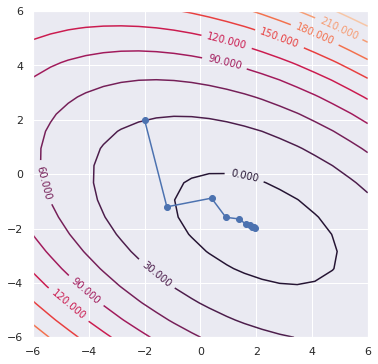

In [53]:
contoursteps(x1, x2, zs, steps)

As it was shown above, the steepest descent makes many steps in the same directions, the idea of the conjugate direction method is to choose the right "orthogonal" directions in advance and walk on them once, but with the correct length of the step. Let us illustrate the concept of $A$ - conjugacy.

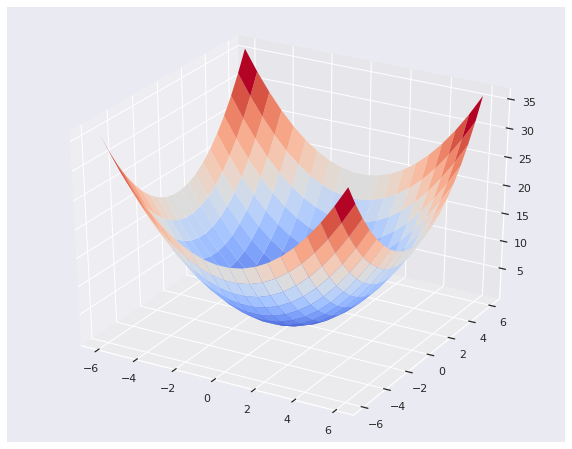

In [37]:
Around = np.matrix([[1, 0],[0, 1]])
bround = np.matrix([[0],[0]])
cround = 0
x1, x2, zs = bowl(Around, bround, cround)

Let's plot some orthogonal vectors

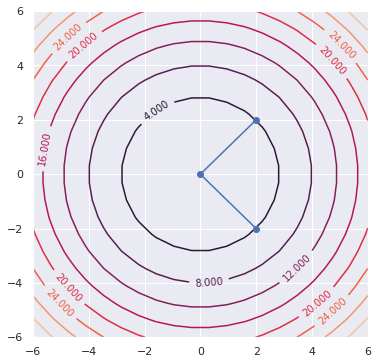

In [38]:
va = np.matrix([[2],[2]])
vb = np.matrix([[2],[-2]])
contoursteps(x1, x2, zs, [(va[0,0],va[1,0]),(0,0),(vb[0,0],vb[1,0])])

Let's see what happens, if we'll scale one of the axes:

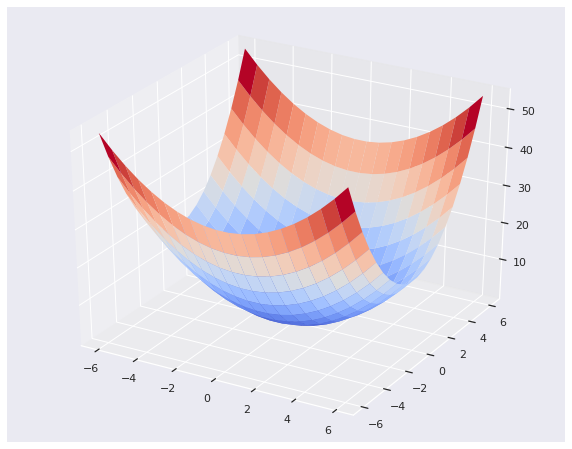

In [39]:
Ascaled = np.matrix([[1, 0],[0, 2]])
bscaled = np.matrix([[0],[0]])
cscaled = 0
x1, x2, zs = bowl(Ascaled, bscaled, cscaled)

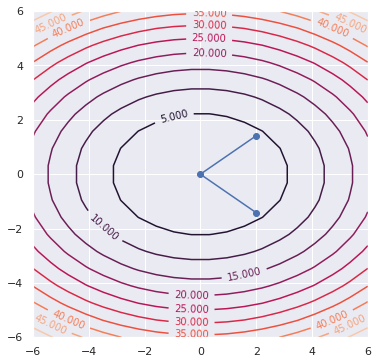

In [40]:
va = np.matrix([[2],[np.sqrt(2)]])
vb = np.matrix([[2],[-np.sqrt(2)]])
contoursteps(x1, x2, zs, [(va[0,0],va[1,0]),(0,0),(vb[0,0],vb[1,0])])

These vectors are not orthogonal anymore:

In [41]:
va.T@vb

matrix([[2.]])

But they are $A$ - orthogonal!


In [42]:
va.T@Ascaled@vb

matrix([[-8.8817842e-16]])

Why does it matter? Let's look at an example of the steepest descent for an isotropic function:

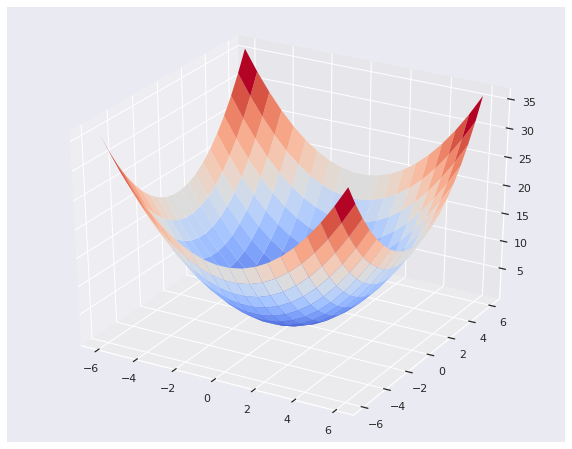

In [73]:
Around = np.matrix([[1, 0],[0, 1]])
bround = np.matrix([[0],[0]])
cround = 0
x1, x2, zs = bowl(Around, bround, cround)

In [0]:
x = np.array([[-2], [-2]]) # x0
steps = []
steps.append((x[0,0], x[1,0]))
i = 0
imax = 10
eps = 0.01
r = bround - np.matrix([[1, 0],[0, 0]]) * x  # replaced Around with this to force residual to be parallel to X axis
delta = r.T * r
delta0 = delta
while i < imax and delta > eps**2 * delta0:
    alpha = float(delta / (r.T * (Around * r)))
    x = x + alpha * r
    steps.append((x[0,0], x[1,0]))  # store steps for future drawing
    r = bround - Around * x
    delta = r.T * r
    i += 1

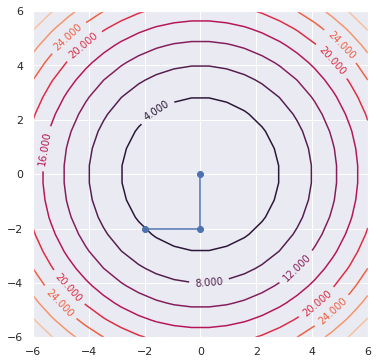

In [75]:
contoursteps(x1, x2, zs, steps)

Just 2 steps! To implement this on an anisotropic square function, we need to take $n$ linearly independent vectors and orthogonalize (naturally, $A$ - orthogonalize) them like the Gram-Schmidt procedure of orthogonalization.

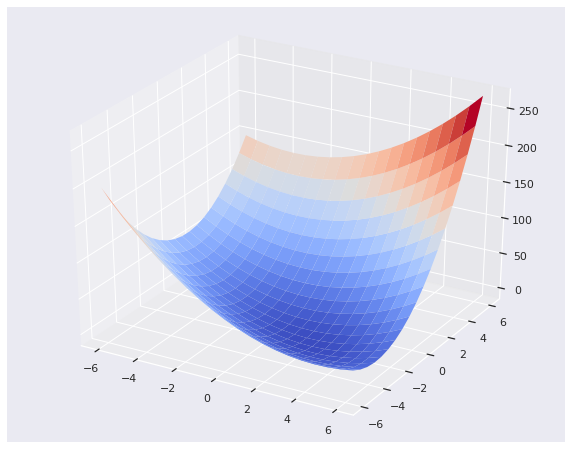

In [46]:
x1, x2, zs = bowl(A, b, c)

In [0]:
x = np.array([[-2], [2]]) # x0
steps = []
steps.append((x[0,0], x[1,0]))
i = 0
imax = 10
eps = 0.01
r = b - A * x
d = r
deltanew = r.T * r
delta0 = deltanew
while i < imax and deltanew > eps**2 * delta0:
    alpha = float(deltanew / float(d.T * (A * d)))
    x = x + alpha * d
    steps.append((x[0, 0], x[1, 0]))
    r = b - A * x
    deltaold = deltanew
    deltanew = r.T * r
    #beta = -float((r.T * A * d) / float(d.T * A * d))
    beta = float(deltanew / float(deltaold))
    d = r + beta * d
    i += 1

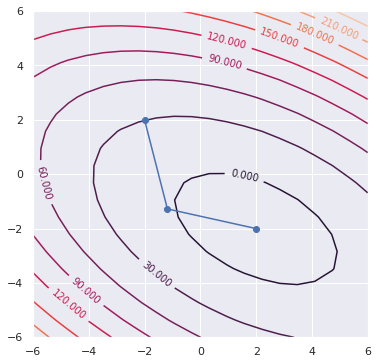

In [55]:
contoursteps(x1, x2, zs, steps)